# Transition story

In [18]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

from network import run_network_recall, train_network, run_network_recall_limit
from connectivity import designed_matrix_sequences, designed_matrix_sequences_local
from analysis import get_recall_duration_for_pattern, get_recall_duration_sequence, create_sequence_chain
from analysis import time_t1, time_t2, time_t1_local, time_t2_local, time_t2_complicated

#### Let's test the create_sequence_chain function

In [19]:
number_of_sequences = 2
half_width = 3
units_to_overload = [12, 13, 14, 15] 
sequences = create_sequence_chain(number_of_sequences=number_of_sequences, 
                                  half_width=half_width, units_to_overload=units_to_overload)

print(sequences)

[[0, 1, 2, 12, 13, 14, 15, 3, 4, 5], [6, 7, 8, 12, 13, 14, 15, 9, 10, 11]]


## An example for debugging

self 3.47314314916 exc 7.55644197409 inh -2.95509991176


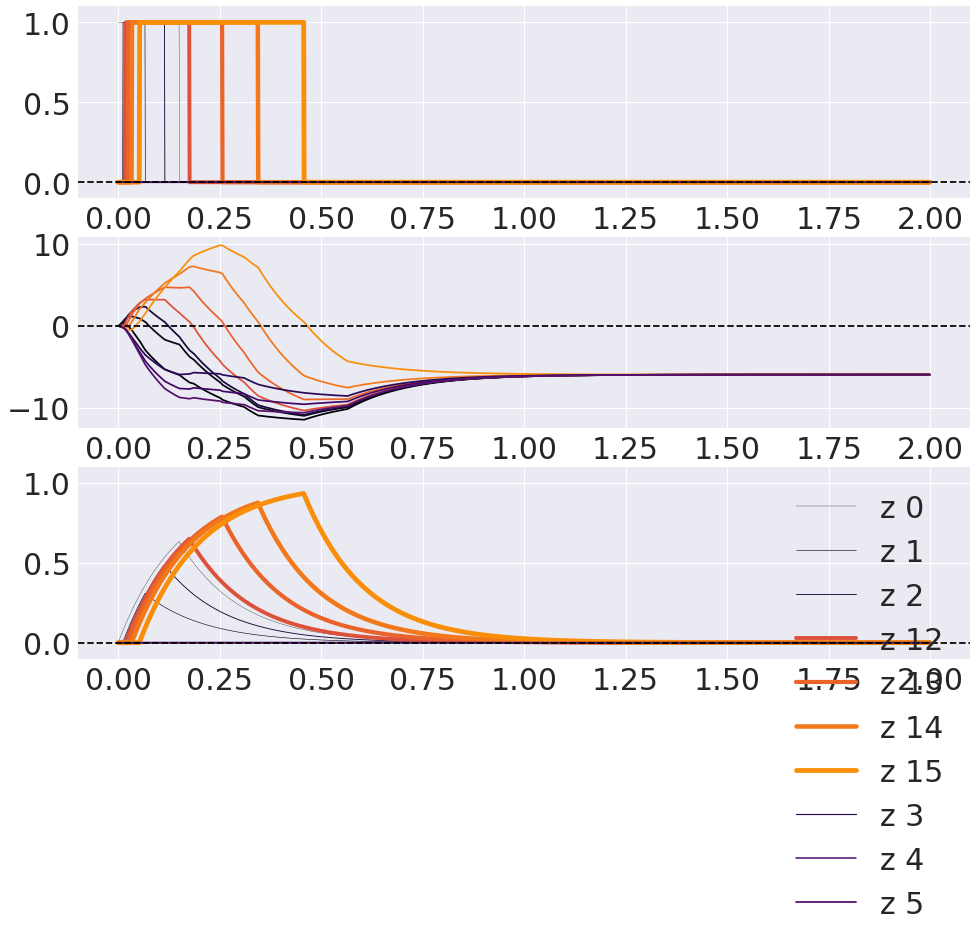

In [46]:
N = 20

dt = 0.0005
tau_m = 0.010

G = 100.0
threshold = 0.5

tau_z = 0.150
tau_z_post = 0.005
tau_w = 0.100
max_w = 30.0
min_w = -3.0

pattern_from = 1
pattern = 2

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
epochs = 5
sigma = 0.0

number_of_sequences = 2
half_width = 3
units_to_overload = [12, 13, 14, 15] 
sequences = create_sequence_chain(number_of_sequences=number_of_sequences, 
                                  half_width=half_width, units_to_overload=units_to_overload)

dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=5, max_w=max_w, min_w=min_w, save_w_history=False, pre_rule=True)
    
w = dic['w']

self = w[pattern, pattern]
exc = w[pattern, pattern_from]
inh = w[pattern_from, pattern]

print('self', self, 'exc', exc, 'inh', inh)

sequence_to_recall = sequences[0]
I_cue = sequence_to_recall[0]
T = 2.0
T_cue = tau_z

dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue, sigma=sigma)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

time = np.arange(0, T, dt)

norm = matplotlib.colors.Normalize(0, N)
cmap = matplotlib.cm.inferno

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = sequence_to_recall
for pattern in patterns:
    width = pattern * 0.3 + 0.3
    ax1.plot(time, x_history[:, pattern], color=cmap(norm(pattern)),linewidth=width, label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], color=cmap(norm(pattern)), label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], color=cmap(norm(pattern)), linewidth=width, label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
# ax1.legend();

ax1.set_ylim([-0.1, 1.1])
# ax2.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
# ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();



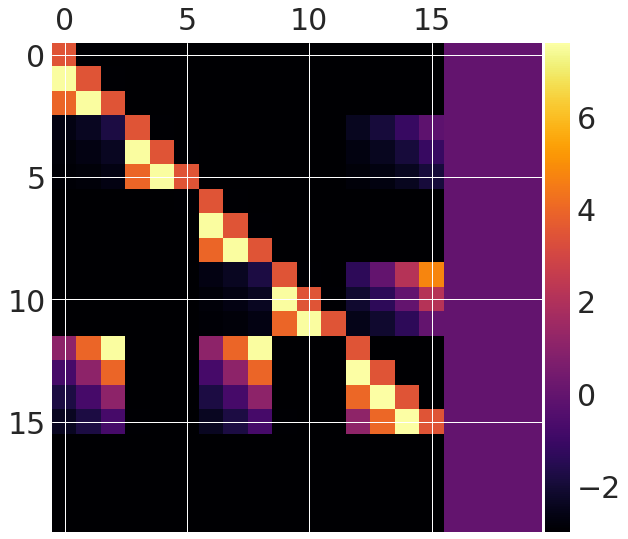

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

norm = matplotlib.colors.Normalize(0, 2)
cmap = matplotlib.cm.inferno

im = ax.matshow(w, cmap=cmap)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax);

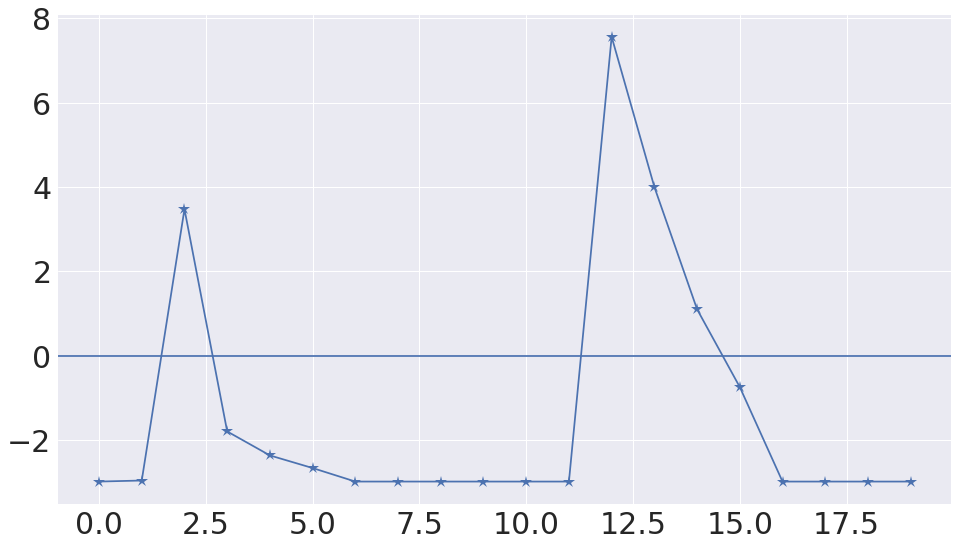

In [42]:
plt.plot(w[:, 2], '*-', markersize=13)
plt.axhline(0)

In [43]:
pattern

5